<a href="https://colab.research.google.com/github/hsrequejo/Projeto-Imersao-AI-Alura/blob/main/ChatComSuaPlanilha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Precisa instalar o pandas AI primeiro**

In [2]:
!pip install pandasai

**Importar o Smart Dataframe e a extensão do Gemini do pandas AI**

In [4]:
from pandasai import SmartDataframe
import pandasai as pdai
import pandas as pd
from pandasai.llm.google_gemini import GoogleGemini

**Importar o user data do google colab para acessar a API KEY**

In [8]:
from google.colab import userdata

**Importar um formato melhor de visualizar os dados e o vega_datasets para usar o dataset "cars" como exemplo**

In [14]:
from google.colab import data_table
from vega_datasets import data

data_table.enable_dataframe_formatter()

**Seleciona o Google Gemini como modelo**

In [9]:
llm = GoogleGemini(userdata.get("GEMINI_API_KEY"))

**Importa o dataframe "cars"**

In [18]:
df = data.cars() # importa o dataframe cars do vega_datasets, mas vc pode usar seu dataframe

df.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


**Transforma o dataframe em um Smart Dataframe e seleciona o modelo, no caso o Google Gemini**


In [28]:
sdf = SmartDataframe(df, config={"llm": llm})

**Faça uma solicitação ao dataframe (planilha)**

**Exemplo:** *"Qual o carro japonês com mais pesado de 1979?"*

Pergunte para a planilha: faça a distribuição de horse power (eixo X) e gasto de combustivel (eixo Y)


'/content/exports/charts/temp_chart.png'

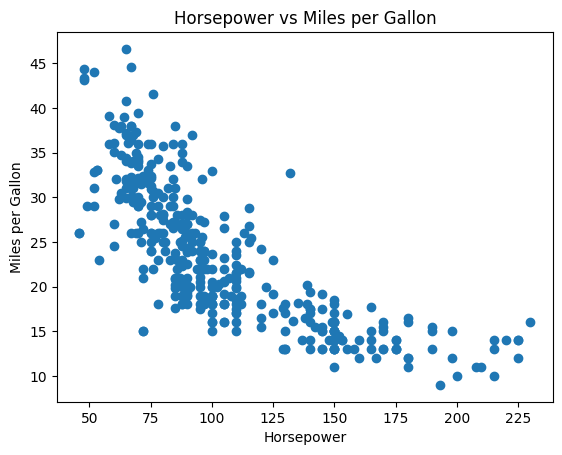

In [36]:
prompt = input("Pergunte para a planilha: ")
sdf.chat(prompt)

**Exemplos:**

In [29]:
sdf.chat("qual o carro com maior horsepower?")

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
123,pontiac grand prix,16.0,8,400.0,230.0,4278,9.5,1973-01-01,USA


In [27]:
sdf.chat("separe todos os carros japoneses de 1980")

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
317,toyota corolla tercel,38.1,4,89.0,60.0,1968,18.8,1980-01-01,Japan
319,datsun 310,37.2,4,86.0,65.0,2019,16.4,1980-01-01,Japan
325,toyota corona liftback,29.8,4,134.0,90.0,2711,15.5,1980-01-01,Japan
326,mazda 626,31.3,4,120.0,75.0,2542,17.5,1980-01-01,Japan
327,datsun 510 hatchback,37.0,4,119.0,92.0,2434,15.0,1980-01-01,Japan
328,toyota corolla,32.2,4,108.0,75.0,2265,15.2,1980-01-01,Japan
329,mazda glc,46.6,4,86.0,65.0,2110,17.9,1980-01-01,Japan
331,datsun 210,40.8,4,85.0,65.0,2110,19.2,1980-01-01,Japan
336,honda civic 1500 gl,44.6,4,91.0,67.0,1850,13.8,1980-01-01,Japan
338,subaru dl,33.8,4,97.0,67.0,2145,18.0,1980-01-01,Japan


In [24]:
sdf.chat("qual a média de peso dos carros do ano de 1980?")

2436.655172413793

'/content/exports/charts/temp_chart.png'

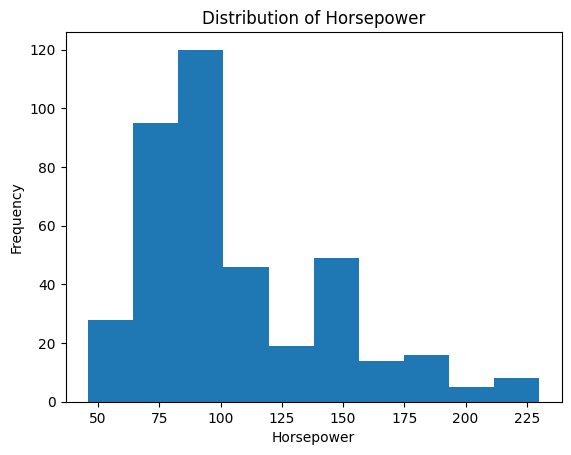

In [23]:
sdf.chat("faça um gráfico da distribuição de horsepower")

'/content/exports/charts/temp_chart.png'

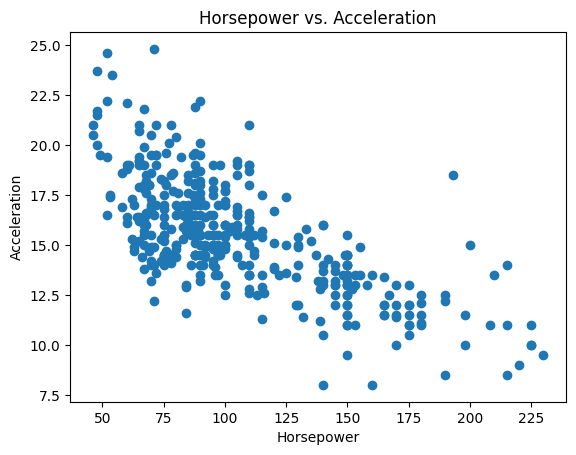

In [21]:
sdf.chat("faça um gráfico de horsepower por aceleração")